In [84]:
%store -r data
%store -r data_once

In [85]:
import pandas as pd
import numpy as np

In [86]:
#Wie lange trended ein Video im Schnitt?
#wie lange braucht es vom publishdate zum trending date?

In [87]:
trended_days = data.groupby('video_id').count()
trended_days = trended_days['trending_date']
trended_days.to_frame()
df = pd.merge(trended_days, data_once ,  on = ['video_id'])

In [88]:
df.trending_date_x.mean()

1.3792353440951572

Text(0.5, 1.0, 'Boxplot Anzahl getrendete Tage')

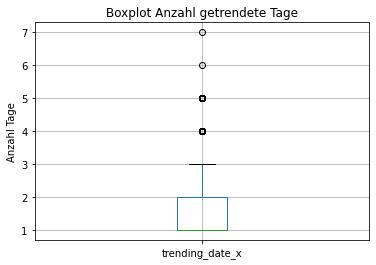

In [89]:
boxplot_trended_days = df.boxplot(column=['trending_date_x'])  
boxplot_trended_days.set_ylabel("Anzahl Tage")
boxplot_trended_days.set_title("Boxplot Anzahl getrendete Tage")

In [90]:
data_once.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29425 entries, 0 to 29424
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                29425 non-null  object
 1   trending_date           29425 non-null  object
 2   title                   29425 non-null  object
 3   channel_title           29425 non-null  object
 4   publish_time            29425 non-null  object
 5   tags                    29425 non-null  object
 6   views                   29425 non-null  int64 
 7   likes                   29425 non-null  int64 
 8   dislikes                29425 non-null  int64 
 9   comment_count           29425 non-null  int64 
 10  comments_disabled       29425 non-null  bool  
 11  ratings_disabled        29425 non-null  bool  
 12  video_error_or_removed  29425 non-null  bool  
 13  description             28133 non-null  object
 14  category_name           29425 non-null  object
dtypes:

In [91]:
df_date = data_once.loc[:, ("video_id","publish_time", "trending_date")]
df_date['publish_time'] = pd.to_datetime(df_date['publish_time'],errors='coerce')

In [92]:
df_date

,video_id,publish_time,trending_date
0,--7vNbh4UNA,2018-04-13 19:00:00+00:00,18.14.04
1,--I0aj8MUdU,2018-02-04 13:19:38+00:00,18.06.02
2,--MtKsH5oBY,2018-05-31 12:40:46+00:00,18.31.05
3,--moh3hSPpY,2018-01-02 13:30:00+00:00,18.03.01
4,--rE6D0_jAw,2018-04-29 14:35:57+00:00,18.30.04
...,...,...,...
29420,zyzuut5pZDg,2018-03-20 13:42:06+00:00,18.22.03
29421,zz-RpiUFY-I,2018-02-28 14:00:11+00:00,18.02.03
29422,zz2ZSsUUbFs,2018-03-20 13:10:03+00:00,18.22.03
29423,zzHW6gJG7W0,2017-12-25 18:44:03+00:00,17.28.12


In [93]:
df_first_day_trending = data_once.groupby(['video_id']).agg(trending_date=('trending_date', 'min'))  

In [94]:
data_once1 = pd.merge(df_first_day_trending, data_once ,  on = ['video_id','trending_date'])

In [95]:
data_once1.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,--7vNbh4UNA,18.14.04,"Responding to ALL The Outrage, Ridiculous H3H3...",Philip DeFranco,2018-04-13T19:00:00.000Z,"Elizabeth Hurley|""Instagram""|""Outrage""|""scanda...",1082647,52113,1284,10602,False,False,False,"Thanks for tuning in this week, ya Beautiful B...",News & Politics
1,--I0aj8MUdU,18.06.02,E diela shqiptare - Ka nje mesazh per ty! (04 ...,RTV KLAN,2018-02-04T13:19:38.000Z,"tv klan|""televizioni klan""|""klanhd""|""ardit gje...",139025,490,78,22,False,False,False,Facebook: https://www.facebook.com/tvklan Talk...,Entertainment
2,--MtKsH5oBY,18.31.05,صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...,RedsTech,2018-05-31T12:40:46.000Z,"RedsTech|""bein sports""|""ريال مدريد""|""real madr...",225445,2156,227,562,False,False,False,I للتواصل معنا Ihttps://www.facebook.com/RedsT...,Sports
3,--moh3hSPpY,18.03.01,Te vreau langa mine! (02.01.2018) - Editie COM...,Kanal D Romania,2018-01-02T13:30:00.000Z,"te vreau langa mine|""kanal d""|""kanal d romania...",17050,100,32,74,False,False,False,Te vreau langa mine! (02.01.2018) - Editie COM...,Entertainment
4,--rE6D0_jAw,18.30.04,HÖR AUF DAS SCHLECHTE ZU SEHEN!,Biyon,2018-04-29T14:35:57.000Z,"Motivation|""Positivität""|""Erfolg""|""Selbstbewus...",5406,964,4,191,False,False,False,"▶︎ Wie du vielleicht mitbekommen hast, ist mei...",Entertainment


In [96]:
data_test3 = data[data.video_id == 'zzHW6gJG7W0']
data_test3

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
19967,zzHW6gJG7W0,17.26.12,4 heftige Serien-Fehler die nicht merkwürdiger...,Jay & Arya,22,2017-12-25T18:44:03.000Z,"serien fehler|""serien fehler jay und arya""|""fe...",283066,21263,385,752,https://i.ytimg.com/vi/zzHW6gJG7W0/default.jpg,False,False,False,DIESE SCHAUSPIELER werden unsere DISNEY-Helden...,People & Blogs
20005,zzHW6gJG7W0,17.27.12,4 heftige Serien-Fehler die nicht merkwürdiger...,Jay & Arya,22,2017-12-25T18:44:03.000Z,"serien fehler|""serien fehler jay und arya""|""fe...",521616,31043,951,1152,https://i.ytimg.com/vi/zzHW6gJG7W0/default.jpg,False,False,False,DIESE SCHAUSPIELER werden unsere DISNEY-Helden...,People & Blogs
20049,zzHW6gJG7W0,17.28.12,4 heftige Serien-Fehler die nicht merkwürdiger...,Jay & Arya,22,2017-12-25T18:44:03.000Z,"serien fehler|""serien fehler jay und arya""|""fe...",622576,34152,1200,1321,https://i.ytimg.com/vi/zzHW6gJG7W0/default.jpg,False,False,False,DIESE SCHAUSPIELER werden unsere DISNEY-Helden...,People & Blogs


In [97]:
data_test2 = data_once1[data_once.video_id == 'zzHW6gJG7W0']
data_test2

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
29423,zzHW6gJG7W0,17.28.12,4 heftige Serien-Fehler die nicht merkwürdiger...,Jay & Arya,2017-12-25T18:44:03.000Z,"serien fehler|""serien fehler jay und arya""|""fe...",622576,34152,1200,1321,False,False,False,DIESE SCHAUSPIELER werden unsere DISNEY-Helden...,People & Blogs


In [9]:
df = data[(data.video_id == "--MtKsH5oBY")]
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
30462,--MtKsH5oBY,18.31.05,صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...,RedsTech,17,2018-05-31T12:40:46.000Z,"RedsTech|""bein sports""|""ريال مدريد""|""real madr...",225445,2156,227,562,https://i.ytimg.com/vi/--MtKsH5oBY/default.jpg,False,False,False,I للتواصل معنا Ihttps://www.facebook.com/RedsT...,Sports
30476,--MtKsH5oBY,18.01.06,صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...,RedsTech,17,2018-05-31T12:40:46.000Z,"RedsTech|""bein sports""|""ريال مدريد""|""real madr...",510561,3516,372,767,https://i.ytimg.com/vi/--MtKsH5oBY/default.jpg,False,False,False,I للتواصل معنا Ihttps://www.facebook.com/RedsT...,Sports


In [10]:
data_once = pd.merge(data_once, trended_days, how ='left', on='video_id')

In [11]:
data_once.head()

,video_id,trending_date_x,trending_date_y,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,trending_date
0,--7vNbh4UNA,1,18.14.04,"Responding to ALL The Outrage, Ridiculous H3H3...",Philip DeFranco,2018-04-13T19:00:00.000Z,"Elizabeth Hurley|""Instagram""|""Outrage""|""scanda...",1082647,52113,1284,10602,False,False,False,"Thanks for tuning in this week, ya Beautiful B...",News & Politics,1
1,--I0aj8MUdU,2,18.06.02,E diela shqiptare - Ka nje mesazh per ty! (04 ...,RTV KLAN,2018-02-04T13:19:38.000Z,"tv klan|""televizioni klan""|""klanhd""|""ardit gje...",139025,490,78,22,False,False,False,Facebook: https://www.facebook.com/tvklan Talk...,Entertainment,2
2,--MtKsH5oBY,2,18.31.05,صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...,RedsTech,2018-05-31T12:40:46.000Z,"RedsTech|""bein sports""|""ريال مدريد""|""real madr...",225445,2156,227,562,False,False,False,I للتواصل معنا Ihttps://www.facebook.com/RedsT...,Sports,2
3,--moh3hSPpY,1,18.03.01,Te vreau langa mine! (02.01.2018) - Editie COM...,Kanal D Romania,2018-01-02T13:30:00.000Z,"te vreau langa mine|""kanal d""|""kanal d romania...",17050,100,32,74,False,False,False,Te vreau langa mine! (02.01.2018) - Editie COM...,Entertainment,1
4,--rE6D0_jAw,1,18.30.04,HÖR AUF DAS SCHLECHTE ZU SEHEN!,Biyon,2018-04-29T14:35:57.000Z,"Motivation|""Positivität""|""Erfolg""|""Selbstbewus...",5406,964,4,191,False,False,False,"▶︎ Wie du vielleicht mitbekommen hast, ist mei...",Entertainment,1


In [12]:
data_once.rename(columns={'trending_date_x' : 'trended_days'})

,video_id,trended_days,trending_date_y,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,trending_date
0,--7vNbh4UNA,1,18.14.04,"Responding to ALL The Outrage, Ridiculous H3H3...",Philip DeFranco,2018-04-13T19:00:00.000Z,"Elizabeth Hurley|""Instagram""|""Outrage""|""scanda...",1082647,52113,1284,10602,False,False,False,"Thanks for tuning in this week, ya Beautiful B...",News & Politics,1
1,--I0aj8MUdU,2,18.06.02,E diela shqiptare - Ka nje mesazh per ty! (04 ...,RTV KLAN,2018-02-04T13:19:38.000Z,"tv klan|""televizioni klan""|""klanhd""|""ardit gje...",139025,490,78,22,False,False,False,Facebook: https://www.facebook.com/tvklan Talk...,Entertainment,2
2,--MtKsH5oBY,2,18.31.05,صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...,RedsTech,2018-05-31T12:40:46.000Z,"RedsTech|""bein sports""|""ريال مدريد""|""real madr...",225445,2156,227,562,False,False,False,I للتواصل معنا Ihttps://www.facebook.com/RedsT...,Sports,2
3,--moh3hSPpY,1,18.03.01,Te vreau langa mine! (02.01.2018) - Editie COM...,Kanal D Romania,2018-01-02T13:30:00.000Z,"te vreau langa mine|""kanal d""|""kanal d romania...",17050,100,32,74,False,False,False,Te vreau langa mine! (02.01.2018) - Editie COM...,Entertainment,1
4,--rE6D0_jAw,1,18.30.04,HÖR AUF DAS SCHLECHTE ZU SEHEN!,Biyon,2018-04-29T14:35:57.000Z,"Motivation|""Positivität""|""Erfolg""|""Selbstbewus...",5406,964,4,191,False,False,False,"▶︎ Wie du vielleicht mitbekommen hast, ist mei...",Entertainment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29420,zyzuut5pZDg,2,18.22.03,Bizim Hikaye 26. Bölüm 3. Tanıtımı,FOX,2018-03-20T13:42:06.000Z,"fox|""dizi""|""izle""|""dizi izle""|""hd""|""bölüm""|""pa...",684544,4940,142,216,False,False,False,Bizim Hikaye: https://www.fox.com.tr/Bizim-Hi...,Entertainment,2
29421,zz-RpiUFY-I,2,18.02.03,Fahrverbote für Diesel? | Harald Lesch,Terra X Lesch & Co,2018-02-28T14:00:11.000Z,"terra x lesch & co.|""terra x""|""harald lesch""|""...",164134,10039,225,1627,False,False,False,Die Richter in Leipzig haben entschieden: Die ...,Science & Technology,2
29422,zz2ZSsUUbFs,2,18.22.03,Folge 2615: Akute Verliebtheit | Rote Rosen,Rote Rosen,2018-03-20T13:10:03.000Z,Rote Rosen,16834,108,11,12,False,False,False,"Di, 20.03.18 | 14:10 Uhr\r\n** Abonniert uns! ...",Entertainment,2
29423,zzHW6gJG7W0,3,17.28.12,4 heftige Serien-Fehler die nicht merkwürdiger...,Jay & Arya,2017-12-25T18:44:03.000Z,"serien fehler|""serien fehler jay und arya""|""fe...",622576,34152,1200,1321,False,False,False,DIESE SCHAUSPIELER werden unsere DISNEY-Helden...,People & Blogs,3
